In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons ,Button
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
sns.set()
state = pd.read_csv('states.csv')

In [35]:
import matplotlib.pyplot as plt
from matplotlib.widgets import AxesWidget, RadioButtons

class MyRadioButtons(RadioButtons):

    def __init__(self, ax, labels, active=0, activecolor='blue', size=49,
                 orientation="vertical", **kwargs):
        """
        Add radio buttons to an `~.axes.Axes`.
        Parameters
        ----------
        ax : `~matplotlib.axes.Axes`
            The axes to add the buttons to.
        labels : list of str
            The button labels.
        active : int
            The index of the initially selected button.
        activecolor : color
            The color of the selected button.
        size : float
            Size of the radio buttons
        orientation : str
            The orientation of the buttons: 'vertical' (default), or 'horizontal'.
        Further parameters are passed on to `Legend`.
        """
        AxesWidget.__init__(self, ax)
        self.activecolor = activecolor
        axcolor = ax.get_facecolor()
        self.value_selected = None

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_navigate(False)

        circles = []
        for i, label in enumerate(labels):
            if i == active:
                self.value_selected = label
                facecolor = activecolor
            else:
                facecolor = axcolor
            p = ax.scatter([],[], s=size, marker="o", edgecolor='black',
                           facecolor=facecolor)
            circles.append(p)
        if orientation == "horizontal":
            kwargs.update(ncol=len(labels), mode="expand")
        kwargs.setdefault("frameon", False)    
        self.box = ax.legend(circles, labels, loc="center", **kwargs)
        self.labels = self.box.texts
        self.circles = self.box.legendHandles
        for c in self.circles:
            c.set_picker(5)
        self.cnt = 0
        self.observers = {}

        self.connect_event('pick_event', self._clicked)


    def _clicked(self, event):
        if (self.ignore(event) or event.mouseevent.button != 1 or
            event.mouseevent.inaxes != self.ax):
            return
        if event.artist in self.circles:
            self.set_active(self.circles.index(event.artist))

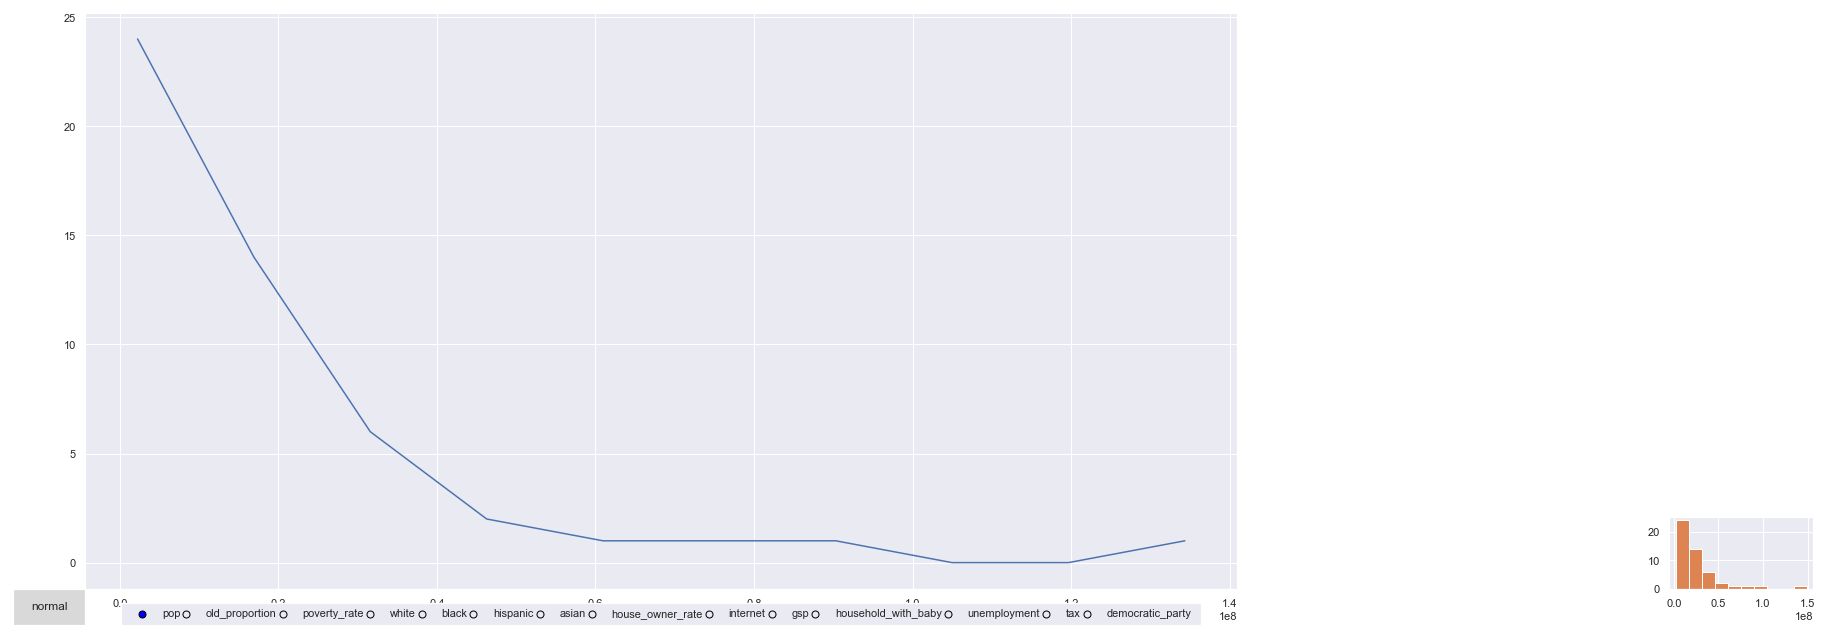

In [70]:
fig = plt.figure(figsize=(20,10))
main =plt.axes([0.1,0.1,0.8,0.8])
small =plt.axes([1.2,0.1,0.1,0.1])
ax1 =plt.axes([0.125,0.05,0.75,0.03])
ax2 = plt.axes([0.05,0.05,0.05,0.05])

slider1 = MyRadioButtons(ax1,['pop', 'old_proportion', 'poverty_rate', 'white',
       'black', 'hispanic', 'asian', 'house_owner_rate', 'internet', 'gsp',
       'household_with_baby', 'unemployment', 'tax', 'democratic_party'],orientation="horizontal")
button = Button(ax2,'normal')

bina = small.hist(state[slider1.value_selected])[1][:-1]
freq = small.hist(state[slider1.value_selected])[0]
dot, = main.plot(bina,freq)
def updata1(label) :
    main.clear()
    bina = small.hist(state[label])[1][:-1]
    freq = small.hist(state[label])[0]
    main.plot(bina,freq)
    lab = np.max(state[label])-np.min(state[label])
    main.set_xlim(np.min(state[label])-0.1*lab,np.max(state[label])+0.1*lab)
    fig.canvas.draw_idle()
def updata2(event) :
    data = np.random.normal(np.mean(state[slider1.value_selected]), np.sqrt(np.var(state[slider1.value_selected])),10000)
    binn = small.hist(data)[1][:-1]
    freqn = small.hist(data)[0]/200
    main.plot(binn,freqn)
    fig.canvas.draw_idle()
button.on_clicked(updata2)
slider1.on_clicked(updata1)
plt.show()